In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Saving fake_real_news.csv to fake_real_news (1).csv
First few rows of the dataset:
                                               title  \
0  GERMAN RESIDENTS FIGHT BACK: Anti-Islamic Song...   
1  (VIDEO) BRAVO! TV HOST SCORCHES OBAMA FOR HIS ...   
2  Greek president tells Turkey's Erdogan no trea...   
3   Colbert Scorches Trump’s Anti-Trans Bigotry; ...   
4  Pentagon chief, Saudi deputy crown prince disc...   

                                                text       subject  \
0  Apparently these Germans are not interested in...     left-news   
1                                      I VE HAD IT!       politics   
2  ATHENS (Reuters) - Greek President Prokopis Pa...     worldnews   
3  During his campaign, Donald Trump promised tha...          News   
4  WASHINGTON (Reuters) - U.S. Defense Secretary ...  politicsNews   

                date  target  
0        Jan 3, 2016       1  
1       Jul 20, 2015       1  
2  December 7, 2017        0  
3  February 24, 2017       1  
4   

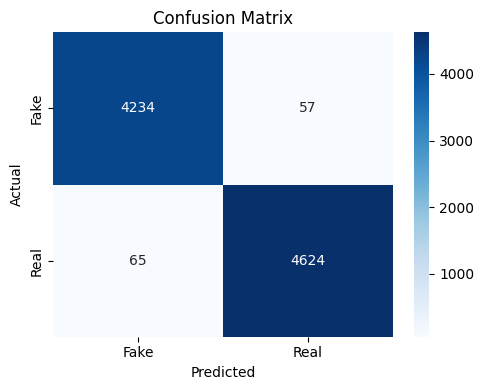

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()


df = pd.read_csv('fake_real_news.csv')


print("First few rows of the dataset:")
print(df.head())


data = df[['text', 'target']].dropna()
data = data.rename(columns={'target': 'label'})  # 1 = real, 0 = fake


data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# split into input and output
X = data['text']
y = data['label']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert text to tf-idf features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# training model using logistic regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# test predictions
preds = model.predict(X_test_tfidf)

# accuracy
acc = accuracy_score(y_test, preds)
print(f"\nAccuracy: {acc*100:.2f}%\n")

# performance report
print("Classification Report:\n")
print(classification_report(y_test, preds))

# confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
